<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Kaggle_SuperAI_SS3_iot_standard_Tutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Credit: 300510-กนธี for the initial sheet tq.*

*Note: I modified it so that it skip GDrive mount part for the simplicity sake.*

-----

300510-กนธี

วิธีการรัน

รันcpu ทิ้งไว้ได้แต่ใช้เวลานานหน่อยในการ process file
---

** หากมีสิ้งใดแนะนำ สามารถบอกได้

# **Mouth Google Drive**

mouth your google drive account ***everytime when start VM***

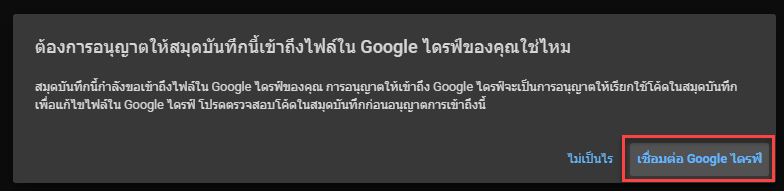

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Download Dataset from Kaggle**

In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c ss3-hackathon-online-iots-and-robotics #download competition dataset

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           9146        296  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           7286        233  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          12745        240  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

# **Unzip file**

In [ ]:
!unzip /content/ss3-hackathon-online-iots-and-robotics.zip

Archive:  /content/ss3-hackathon-online-iots-and-robotics.zip
  inflating: IOT_Submit.csv          
  inflating: IOT_Test.csv            
  inflating: IOT_Train.csv           


# import Library

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
!pip install optuna

In [ ]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pathlib
import cv2
import statistics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from scipy.stats import norm, skew
from numpy.ma.extras import average
from datetime import datetime
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances

read file csv with pandas

In [ ]:
df = pd.read_csv("./IOT_Train.csv")
df_test= pd.read_csv('./IOT_Test.csv')


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tambon_code,13635.0,452665.897543,213925.103701,102601.000000,300903.000000,380704.000000,550404.000000,860206.000000
amphur_code,13635.0,4526.625376,2139.240731,1026.000000,3009.000000,3807.000000,5504.000000,8602.000000
province_code,13635.0,45.179391,21.448269,10.000000,30.000000,38.000000,55.000000,86.000000
latitude,13635.0,15.498114,2.345306,10.579849,14.533026,16.494229,18.142499,18.241106
longitude,13635.0,101.728711,2.180078,98.573417,100.569662,102.052114,104.350891,104.495172
humid,13635.0,80.428258,12.442925,40.900000,71.000000,82.400000,90.600000,100.000000
light,13635.0,33.196553,34.509041,0.000000,0.000000,16.000000,68.000000,96.000000
pm10,6841.0,7.657652,8.449023,1.000000,3.000000,6.000000,10.000000,368.000000
pm2.5,6841.0,6.449203,8.415738,0.000000,2.000000,4.000000,9.000000,368.000000
rainfall,13635.0,0.135827,1.112371,0.000000,0.000000,0.000000,0.000000,34.100000


# Cutting outliner

The scatter plot between wind_direct and wind_speed demonstrates few point of data from train and test data 

which contain extreme values that are outside the range of what is expected and unlike the other data

Therefore, train date which has wind_speed is higher than 10000 are dropped 

on the other hand, test data cannot able to drop because it contain in submit file 

so, test data which has same environment (Ex : humid and location) are using to calculate averange of wind_speed

and replece anomal point by average value 



c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



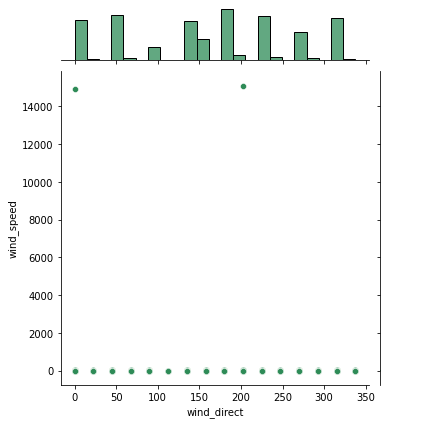

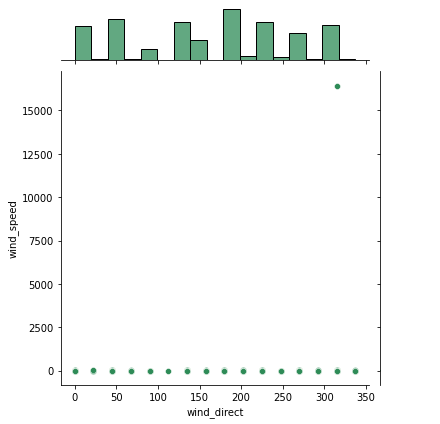

In [ ]:
JG1=sns.jointplot(df['wind_direct'], df['wind_speed'], kind='scatter',color='seagreen')
JG2=sns.jointplot(df_test['wind_direct'], df_test['wind_speed'], kind='scatter', color='seagreen', )

Display extreme values from dataframe

In [ ]:
df.loc[df['wind_speed']> 1000]

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
3931,3C71BF15DB04,บ้านสำโรงเกียรติ_2,330802,บักดอง,3308,ขุนหาญ,33,ศรีสะเกษ,14.533026,104.495172,2022-05-05 15:00:00+07:00,71.9,46.0,17.0,16.0,0.0,0.0,14906.8,31.4
4274,3C71BF15DB04,บ้านสำโรงเกียรติ_2,330802,บักดอง,3308,ขุนหาญ,33,ศรีสะเกษ,14.533026,104.495172,2022-07-02 00:00:00+07:00,82.1,0.0,6.0,5.0,0.0,202.5,15094.3,27.5


Drop row which more than 10000

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



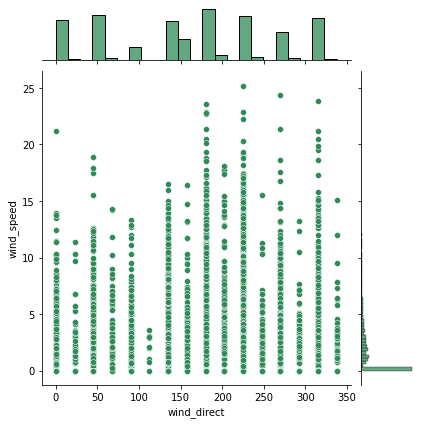

In [ ]:
df = df.drop(df[df['wind_speed']> 10000].index)
sns.jointplot(df['wind_direct'], df['wind_speed'], kind='scatter', color='seagreen')

Display extreme values of test set from dataframe

In [ ]:
df_test.loc[df_test['wind_speed']> 1000]

,id,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed
799,800,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-05 12:00:00+07:00,70.1,86.0,1.0,0.0,0.0,315.0,16438.4


Select same environment 

In [ ]:
df_ave_wind =df_test[(df_test['humid'] < 70.3 )&(df_test['humid'] > 70 )&(df_test['province_code'] == 38 )]
df_ave_wind 

,id,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed
570,571,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-06-23 16:00:00+07:00,70.2,70.0,2.0,1.0,0.0,0.0,0.0
592,593,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-05-25 11:00:00+07:00,70.1,93.0,4.0,2.0,0.0,0.0,1.7
711,712,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-05-17 03:00:00+07:00,70.2,12.0,3.0,2.0,0.0,45.0,4.1
799,800,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-05 12:00:00+07:00,70.1,86.0,1.0,0.0,0.0,315.0,16438.4
803,804,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-05-05 00:00:00+07:00,70.2,4.0,2.0,1.0,0.0,45.0,3.0


Find averange and using it instead of old value

In [ ]:
avg_wind=average(df_ave_wind['wind_speed'][df_ave_wind['wind_speed'] <1000 ])
print(' averange of wind_speed = ', avg_wind)
df_test.loc[df_test['wind_speed'] > 1000,'wind_speed'] =avg_wind

 averange of wind_speed =  2.2


Drop some data of train set which out of range of test set

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



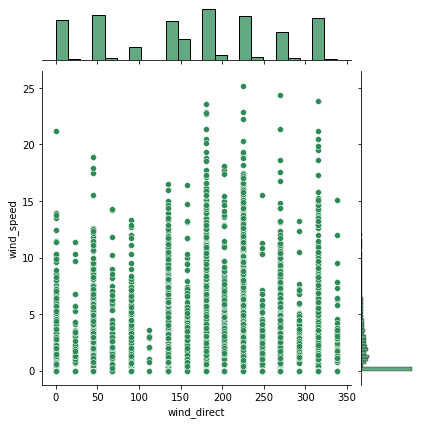

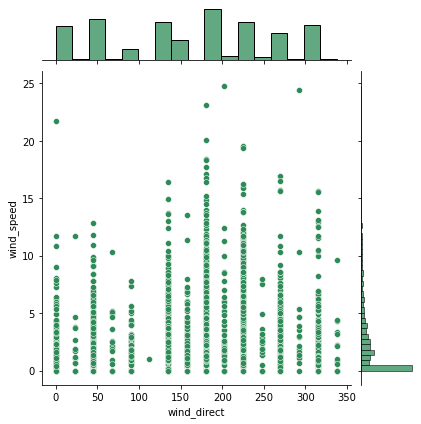

In [ ]:
df = df.drop(df[(df['wind_speed']>26)].index)
sns.jointplot('wind_direct', 'wind_speed', df, kind='scatter', color='seagreen')
sns.jointplot('wind_direct', 'wind_speed', df_test, kind='scatter', color='seagreen')

replace this on with pm10 and pm2.5

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



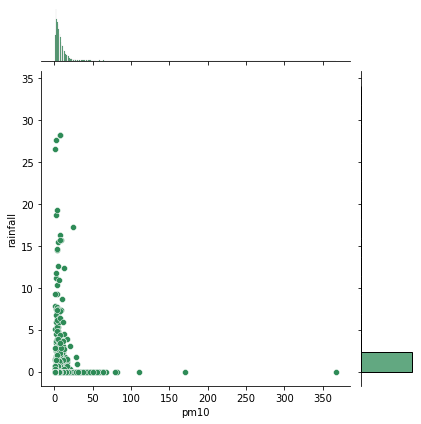

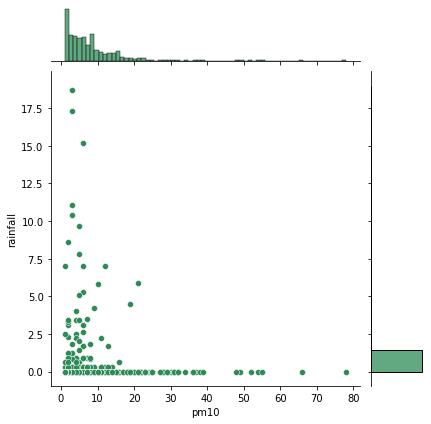

In [ ]:
sns.jointplot(df['pm10'], df['rainfall'], kind='scatter', color='seagreen')
sns.jointplot( df_test['pm10'], df_test['rainfall'], kind='scatter', color='seagreen')

In [ ]:
df = df.drop(df[(df['pm10']>100)].index)
df = df.drop(df[(df['rainfall']>20)].index)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



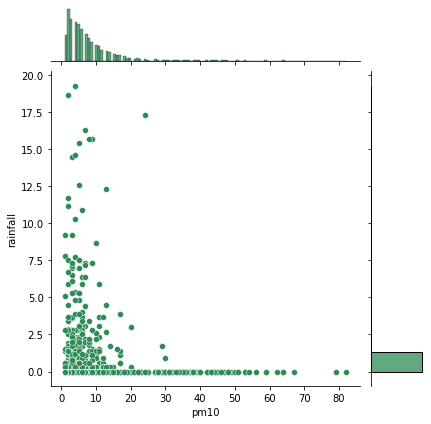

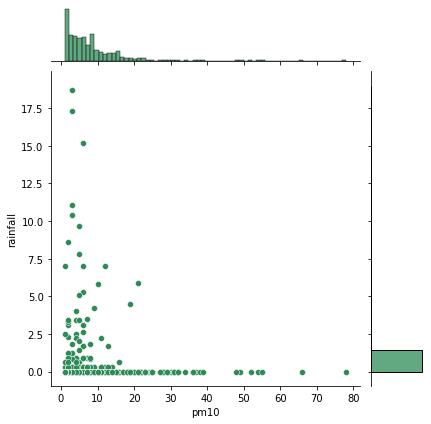

In [ ]:
sns.jointplot(df['pm10'], df['rainfall'], kind='scatter', color='seagreen')
sns.jointplot( df_test['pm10'], df_test['rainfall'], kind='scatter', color='seagreen')

# data processing

check null data 

In [ ]:
df.isnull().sum()

mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             6788
pm2.5            6788
rainfall            0
wind_direct         0
wind_speed          0
temp                1
dtype: int64

create function to change text to label integer

In [ ]:
def create_dic(dict_data,text):
  for i,j in enumerate(df[text]) :
    if j in dict_data:
      pass
    else :
      dict_data.update({j:len(dict_data)})
  print(dict_data)
  return dict_data

In [ ]:
mac={}
create_dic(mac,'mac')
df['mac'].replace(mac,inplace=True)
df_test['mac'].replace(mac,inplace=True)

{'3C71BF18EA64': 0, '807D3AF57920': 1, '3C71BF15DB04': 2, '3C71BF164F90': 3, '3C71BF17CDBC': 4, '3C71BF1B1E28': 5, '30AEA4F7AE44': 6, '3C71BF18CEA4': 7}


Example for select pm10 and 2.5 which not null in each location 

In [ ]:
df_ave_pm =df[(df['pm10']>=0 )&(df['mac'] ==0)]
df_ave_pm.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
17,0,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-09 16:00:00+07:00,82.7,45.0,1.0,0.0,0.0,22.5,3.0,28.5
41,0,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-30 13:00:00+07:00,59.8,83.0,1.0,0.0,0.0,180.0,4.3,38.5
47,0,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-30 12:00:00+07:00,58.4,83.0,1.0,0.0,0.0,135.0,2.3,39.2
190,0,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-18 08:00:00+07:00,58.6,70.0,1.0,0.0,0.0,225.0,6.4,37.1
265,0,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-24 13:00:00+07:00,57.5,85.0,1.0,0.0,0.0,0.0,1.0,38.0


Replece null value of pm10 and 2.5 with average values in each location 

In [ ]:
avg_pm10_train,avg_pm2_5_train = [],[]
avg_pm10_test,avg_pm2_5_test = [],[]

for i,j in enumerate(mac) :
    df_ave_pm =df[(df['pm10']>=0 )&(df['mac'] ==i)]
    avg_pm10_train.append(average(df_ave_pm['pm10']))
    avg_pm2_5_train.append(average(df_ave_pm['pm2.5']))

    df_test_ave_pm =df_test[(df_test['pm10']>=0 )&(df_test['mac'] ==i)]
    avg_pm10_test.append(average(df_test_ave_pm['pm10']))
    avg_pm2_5_test.append(average(df_test_ave_pm['pm2.5']))
    
    #replace null with avg
    df.loc[(df['pm10'].isnull())&(df['mac'] ==i),'pm10'] = avg_pm10_train[i]
    df.loc[(df['pm2.5'].isnull())&(df['mac'] ==i),'pm2.5'] = avg_pm2_5_train[i]

    df_test.loc[(df_test['pm10'].isnull())&(df['mac'] ==i),'pm10'] = avg_pm10_test[i]
    df_test.loc[(df_test['pm2.5'].isnull())&(df['mac'] ==i),'pm2.5'] = avg_pm2_5_test[i]


print('avg_pm10_train =',avg_pm10_train)
print('avg_pm2_5_train =',avg_pm2_5_train)
print('avg_pm10_test =',avg_pm10_test)
print('avg_pm2_5_test =',avg_pm2_5_test)

avg_pm10_train = [1.0961538461538463, 3.24376088218224, 8.830088495575222, 7.23342939481268, 11.794215795328142, 9.929988331388564, 2.817891373801917, 1.0]
avg_pm2_5_train = [0.09615384615384616, 1.7040046430644225, 7.7752212389380535, 6.23342939481268, 10.63959955506118, 8.83022170361727, 1.5175718849840256, 0.0]
avg_pm10_test = [2.0, 3.252314814814815, 8.912735849056604, 2.972568578553616, 7.028329689643347, 10.414918414918414, 3.226985811042525, 3.123463852868889]
avg_pm2_5_test = [0.7, 1.6319444444444444, 7.8584905660377355, 1.723940149625935, 5.670463605967078, 9.331002331002331, 1.6795106738683125, 1.5385837782862948]


split datetime to time, day and month into dataframe

In [ ]:
df['time_day'] =  df['time'].apply(pd.to_datetime).dt.strftime("%d").astype('int')
df['time_month'] =  df['time'].apply(pd.to_datetime).dt.strftime("%m").astype('int')
df['time'] =  df['time'].apply(pd.to_datetime).dt.strftime('%H').astype('int')

df_test['time_day'] =  df_test['time'].apply(pd.to_datetime).dt.strftime("%d").astype('int')
df_test['time_month'] =  df_test['time'].apply(pd.to_datetime).dt.strftime("%m").astype('int')
df_test['time'] =  df_test['time'].apply(pd.to_datetime).dt.strftime('%H').astype('int')


redece located feature to 1 feature (Ex : mac) via drop another located feature  

In [ ]:
df = df.drop(columns=['tambon_code','amphur_code','province_code','station_name','tambon_namt','amphur_namt','province_namt',]).astype('float64')
df_test= df_test.drop(columns=['tambon_code','amphur_code','province_code','station_name','tambon_namt','amphur_namt','province_namt',]).astype('float64')


drop null in all df

In [ ]:
df.dropna(inplace=True)
a= df['temp']
df = df.drop(columns=['temp'])
df['temp']=a
df.head()

,mac,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,time_day,time_month,temp
0,0.0,15.112831,102.052114,15.0,70.6,59.0,1.096154,0.096154,0.0,45.0,4.3,20.0,7.0,32.6
1,0.0,15.112831,102.052114,9.0,62.3,76.0,1.096154,0.096154,0.0,45.0,1.9,16.0,5.0,37.9
2,0.0,15.112831,102.052114,19.0,90.3,0.0,1.096154,0.096154,0.0,135.0,3.2,26.0,6.0,26.4
3,0.0,15.112831,102.052114,4.0,91.7,0.0,1.096154,0.096154,0.0,157.5,0.0,16.0,7.0,25.6
4,0.0,15.112831,102.052114,8.0,59.1,71.0,1.096154,0.096154,0.0,180.0,2.3,30.0,5.0,36.2


Plot correlation matrix

<AxesSubplot:>

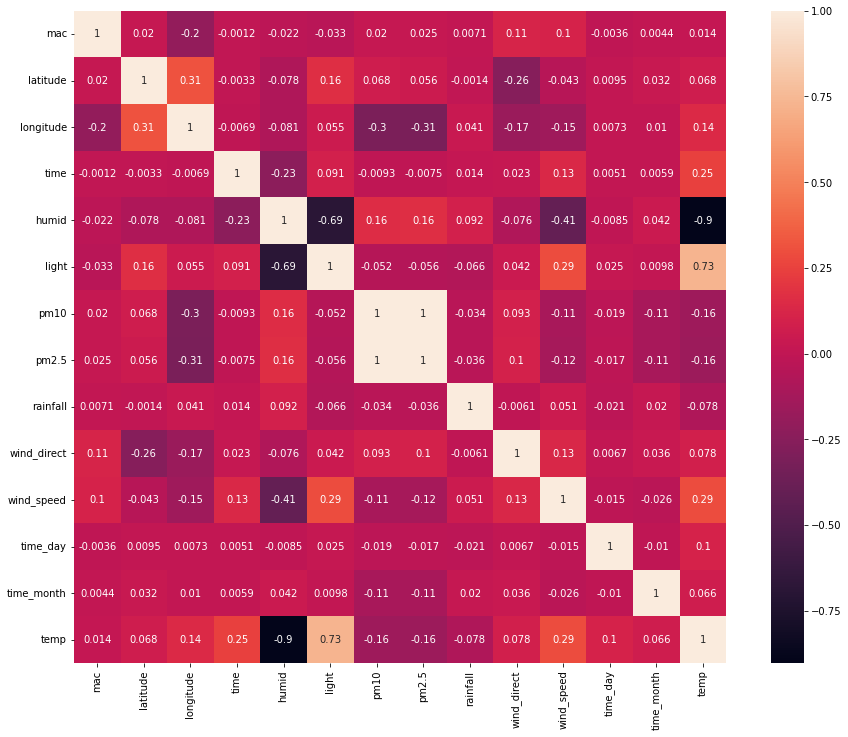

In [ ]:
corrmat = df.corr()
plt.subplots(figsize=(16,12))
sns.heatmap(corrmat, vmax=1, square=True,cbar=True, annot=True)

Drop rainfall and wind_direct because low correlation

In [ ]:
drop =['temp','rainfall','wind_direct'] 
df_train = df.drop(columns=drop)
df_val = df['temp']

Split data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_val, test_size=0.2, random_state=69402) #0.02

# Fit Model

### Find best hyperparameter via optuna (random value in range) 

In [ ]:
def objective(trial):
   
    X_train, X_val, y_train, y_test =  train_test_split(df_train, df_val, test_size=0.2, random_state=69402) #0.02

    param = {
        "objective": trial.suggest_categorical("objective", ["RMSE"]),
        'learning_rate' : trial.suggest_float('learning_rate', 0.04, 0.06),
        "colsample_bylevel": trial.suggest_float('colsample_bylevel',0.30, 0.40),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 0.30, 0.40),
        "max_depth": trial.suggest_int("max_depth", 8, 12),
        # 'max_bin': trial.suggest_int('max_bin', 200, 400),
        # 'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        # "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        # "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        
    }
    # if param["bootstrap_type"] == "Bayesian":
    #     param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    # elif param["bootstrap_type"] == "Bernoulli":
    #     param["subsample"] = trial.suggest_float("subsample", 0.1, 1)


    gbm = cb.CatBoostRegressor(**param, iterations = 10000)

    gbm.fit(X_train, y_train, eval_set = [(X_val, y_test)], verbose = 0, early_stopping_rounds = 222)

    preds = gbm.predict(X_val)
    pred_labels = np.rint(preds)
    mae =mean_absolute_error(y_test,preds)
    
    return mae

study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 20, show_progress_bar = True)
print('Best value: ', study.best_value)

[I 2022-11-07 20:10:40,267] A new study created in memory with name: no-name-37035c67-52a5-423c-9bcf-4bb5d7eddb0a
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.

  5%|▌         | 1/20 [01:25<27:08, 85.71s/it]

[I 2022-11-07 20:12:05,975] Trial 0 finished with value: 0.4363673976947776 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04502752542879584, 'colsample_bylevel': 0.3389909109215768, 'l2_leaf_reg': 0.3800426876895163, 'max_depth': 11}. Best is trial 0 with value: 0.4363673976947776.


 10%|█         | 2/20 [05:00<48:32, 161.79s/it]

[I 2022-11-07 20:15:41,021] Trial 1 finished with value: 0.42913758848473654 and parameters: {'objective': 'RMSE', 'learning_rate': 0.040526224941300586, 'colsample_bylevel': 0.3970320303401309, 'l2_leaf_reg': 0.3452731601107947, 'max_depth': 12}. Best is trial 1 with value: 0.42913758848473654.


 15%|█▌        | 3/20 [05:19<27:16, 96.27s/it] 

[I 2022-11-07 20:15:59,327] Trial 2 finished with value: 0.449413666900029 and parameters: {'objective': 'RMSE', 'learning_rate': 0.05235007582140486, 'colsample_bylevel': 0.38693395897817706, 'l2_leaf_reg': 0.357071086197736, 'max_depth': 8}. Best is trial 1 with value: 0.42913758848473654.


 20%|██        | 4/20 [06:32<23:13, 87.07s/it]

[I 2022-11-07 20:17:12,286] Trial 3 finished with value: 0.4321242101177774 and parameters: {'objective': 'RMSE', 'learning_rate': 0.05865643206046284, 'colsample_bylevel': 0.3720175228723274, 'l2_leaf_reg': 0.3925388077959482, 'max_depth': 11}. Best is trial 1 with value: 0.42913758848473654.


 25%|██▌       | 5/20 [07:56<21:33, 86.20s/it]

[I 2022-11-07 20:18:36,948] Trial 4 finished with value: 0.43595100548448096 and parameters: {'objective': 'RMSE', 'learning_rate': 0.058233788284396557, 'colsample_bylevel': 0.38956297376555066, 'l2_leaf_reg': 0.3419101371975172, 'max_depth': 11}. Best is trial 1 with value: 0.42913758848473654.


 30%|███       | 6/20 [08:40<16:46, 71.88s/it]

[I 2022-11-07 20:19:21,030] Trial 5 finished with value: 0.4408800581518048 and parameters: {'objective': 'RMSE', 'learning_rate': 0.05958984990513203, 'colsample_bylevel': 0.38873822078671477, 'l2_leaf_reg': 0.3148359240410957, 'max_depth': 9}. Best is trial 1 with value: 0.42913758848473654.


 35%|███▌      | 7/20 [09:05<12:13, 56.43s/it]

[I 2022-11-07 20:19:45,647] Trial 6 finished with value: 0.4470323570310673 and parameters: {'objective': 'RMSE', 'learning_rate': 0.058269916919596314, 'colsample_bylevel': 0.3220152213919438, 'l2_leaf_reg': 0.3148280051492308, 'max_depth': 8}. Best is trial 1 with value: 0.42913758848473654.


 40%|████      | 8/20 [09:33<09:27, 47.29s/it]

[I 2022-11-07 20:20:13,355] Trial 7 finished with value: 0.4479144120642677 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04119527915499525, 'colsample_bylevel': 0.34638490374069497, 'l2_leaf_reg': 0.31768445643849913, 'max_depth': 8}. Best is trial 1 with value: 0.42913758848473654.


 45%|████▌     | 9/20 [09:53<07:07, 38.90s/it]

[I 2022-11-07 20:20:33,821] Trial 8 finished with value: 0.447344139485223 and parameters: {'objective': 'RMSE', 'learning_rate': 0.05802828404529339, 'colsample_bylevel': 0.3904680570124949, 'l2_leaf_reg': 0.3341820559959296, 'max_depth': 8}. Best is trial 1 with value: 0.42913758848473654.


 50%|█████     | 10/20 [11:03<08:04, 48.43s/it]

[I 2022-11-07 20:21:43,575] Trial 9 finished with value: 0.43531138821889015 and parameters: {'objective': 'RMSE', 'learning_rate': 0.05853916264703107, 'colsample_bylevel': 0.35241183514666835, 'l2_leaf_reg': 0.3505315750980954, 'max_depth': 11}. Best is trial 1 with value: 0.42913758848473654.


 55%|█████▌    | 11/20 [15:00<15:56, 106.26s/it]

[I 2022-11-07 20:25:40,955] Trial 10 finished with value: 0.4370039183646439 and parameters: {'objective': 'RMSE', 'learning_rate': 0.047760728487551765, 'colsample_bylevel': 0.36463895961799675, 'l2_leaf_reg': 0.3688371991603708, 'max_depth': 12}. Best is trial 1 with value: 0.42913758848473654.


 60%|██████    | 12/20 [16:57<14:36, 109.56s/it]

[I 2022-11-07 20:27:38,057] Trial 11 finished with value: 0.4420321590076371 and parameters: {'objective': 'RMSE', 'learning_rate': 0.052937894328165556, 'colsample_bylevel': 0.3710577759790464, 'l2_leaf_reg': 0.39464755555800446, 'max_depth': 12}. Best is trial 1 with value: 0.42913758848473654.


 65%|██████▌   | 13/20 [17:43<10:31, 90.26s/it] 

[I 2022-11-07 20:28:23,907] Trial 12 finished with value: 0.4310972965943271 and parameters: {'objective': 'RMSE', 'learning_rate': 0.040553405382850564, 'colsample_bylevel': 0.3995437307778123, 'l2_leaf_reg': 0.3945431794256036, 'max_depth': 10}. Best is trial 1 with value: 0.42913758848473654.


 70%|███████   | 14/20 [18:41<08:02, 80.35s/it]

[I 2022-11-07 20:29:21,377] Trial 13 finished with value: 0.43572767966815956 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04079295476715126, 'colsample_bylevel': 0.39967823245910405, 'l2_leaf_reg': 0.3668037502354307, 'max_depth': 10}. Best is trial 1 with value: 0.42913758848473654.


 75%|███████▌  | 15/20 [19:33<05:59, 71.81s/it]

[I 2022-11-07 20:30:13,385] Trial 14 finished with value: 0.4278086420907446 and parameters: {'objective': 'RMSE', 'learning_rate': 0.043707153600626325, 'colsample_bylevel': 0.3769832550463588, 'l2_leaf_reg': 0.33155528858875677, 'max_depth': 10}. Best is trial 14 with value: 0.4278086420907446.


 80%|████████  | 16/20 [20:01<03:54, 58.62s/it]

[I 2022-11-07 20:30:41,381] Trial 15 finished with value: 0.4382841122103381 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04390658897487336, 'colsample_bylevel': 0.3019510394642348, 'l2_leaf_reg': 0.32576299104263684, 'max_depth': 9}. Best is trial 14 with value: 0.4278086420907446.


 85%|████████▌ | 17/20 [20:34<02:32, 50.97s/it]

[I 2022-11-07 20:31:14,571] Trial 16 finished with value: 0.43599069529131174 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04437154594344636, 'colsample_bylevel': 0.37712155486413146, 'l2_leaf_reg': 0.3380235807449578, 'max_depth': 9}. Best is trial 14 with value: 0.4278086420907446.


 90%|█████████ | 18/20 [24:04<03:17, 98.68s/it]

[I 2022-11-07 20:34:44,319] Trial 17 finished with value: 0.43659595292966763 and parameters: {'objective': 'RMSE', 'learning_rate': 0.04699368625197529, 'colsample_bylevel': 0.3594270279753346, 'l2_leaf_reg': 0.3060737973193822, 'max_depth': 12}. Best is trial 14 with value: 0.4278086420907446.


 95%|█████████▌| 19/20 [25:02<01:26, 86.49s/it]

[I 2022-11-07 20:35:42,405] Trial 18 finished with value: 0.4295111740466544 and parameters: {'objective': 'RMSE', 'learning_rate': 0.043413321789164, 'colsample_bylevel': 0.3798148528380186, 'l2_leaf_reg': 0.329277971451883, 'max_depth': 10}. Best is trial 14 with value: 0.4278086420907446.


100%|██████████| 20/20 [26:45<00:00, 80.28s/it]

[I 2022-11-07 20:37:25,833] Trial 19 finished with value: 0.4353222752802814 and parameters: {'objective': 'RMSE', 'learning_rate': 0.048923701808709925, 'colsample_bylevel': 0.332260934571452, 'l2_leaf_reg': 0.3476872291346343, 'max_depth': 11}. Best is trial 14 with value: 0.4278086420907446.
Best value:  0.4278086420907446


In [ ]:
# Historic
plot_optimization_history(study)

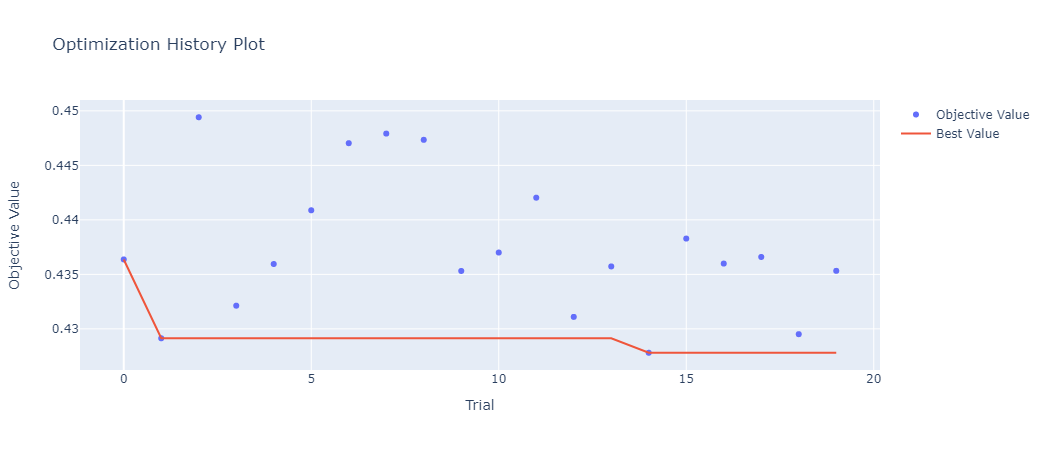

In [ ]:
# Importance
optuna.visualization.plot_param_importances(study)

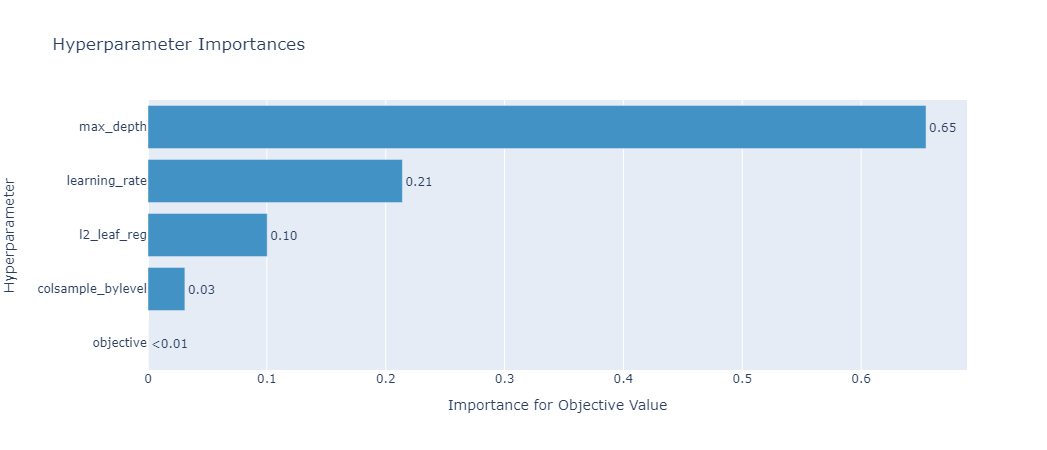

### Use best hyperparameter from optuna to fit CatBoostRegressor model

In [ ]:
trial = study.best_trial
parameters ={}
for key, value in trial.params.items():
    parameters.update({key:value})
print(parameters)

#this is my best value
# parameters= { 'depth': '11',
#              'learning_rate' : '0.053011991',          
#              'l2_leaf_reg'   : '0.3501',
#              'colsample_bylevel': '0.430001',}

model = cb.CatBoostRegressor(**parameters, iterations = 4000)  
model.fit(X_train, y_train, eval_set = [(X_test, y_test)],use_best_model=True, verbose = 1, early_stopping_rounds = 200)


{'objective': 'RMSE', 'learning_rate': 0.043707153600626325, 'colsample_bylevel': 0.3769832550463588, 'l2_leaf_reg': 0.33155528858875677, 'max_depth': 10}
0:	learn: 4.1998514	test: 4.0346432	best: 4.0346432 (0)	total: 5.54ms	remaining: 22.2s
1:	learn: 4.0426222	test: 3.8804366	best: 3.8804366 (1)	total: 12.3ms	remaining: 24.6s
2:	learn: 3.8957472	test: 3.7397611	best: 3.7397611 (2)	total: 22.6ms	remaining: 30.1s
3:	learn: 3.7561119	test: 3.6024926	best: 3.6024926 (3)	total: 31.8ms	remaining: 31.8s
4:	learn: 3.6200138	test: 3.4677768	best: 3.4677768 (4)	total: 42.7ms	remaining: 34.1s
5:	learn: 3.4878330	test: 3.3348207	best: 3.3348207 (5)	total: 52.1ms	remaining: 34.7s
6:	learn: 3.3665486	test: 3.2123766	best: 3.2123766 (6)	total: 62.6ms	remaining: 35.7s
7:	learn: 3.2510553	test: 3.0988494	best: 3.0988494 (7)	total: 72.3ms	remaining: 36.1s
8:	learn: 3.1626599	test: 3.0063016	best: 3.0063016 (8)	total: 73.7ms	remaining: 32.7s
9:	learn: 3.0579882	test: 2.8989676	best: 2.8989676 (9)	total:

Calcurate MAE

In [ ]:
#0.4305724615500522
y_predict=model.predict(X_test)
MAE =mean_absolute_error(y_test,y_predict)
print(MAE)

0.43491662298945716


In [ ]:
drop2=[]
drop2=drop
drop2.pop(0)
drop2.append('id')
df_submit=df_test.drop(columns=drop2)
df_submit.head()

,mac,latitude,longitude,time,humid,light,pm10,pm2.5,wind_speed,time_day,time_month
0,0.0,15.112831,102.052114,4.0,88.9,1.0,2.0,0.7,2.3,23.0,5.0
1,0.0,15.112831,102.052114,16.0,85.0,40.0,2.0,0.7,1.5,12.0,5.0
2,0.0,15.112831,102.052114,3.0,88.9,7.0,2.0,0.7,0.0,20.0,6.0
3,0.0,15.112831,102.052114,13.0,81.9,66.0,2.0,0.7,0.2,13.0,7.0
4,0.0,15.112831,102.052114,9.0,64.9,71.0,2.0,0.7,2.4,5.0,7.0


Predict test set

In [ ]:
y_submit=model.predict(df_submit)

In [ ]:
df_final = pd.read_csv('./IOT_Submit.csv')
df_final

,id,temp
0,1,25.6
1,2,30.1
2,3,24.7
3,4,NaN
4,5,NaN
...,...,...
3408,3409,NaN
3409,3410,NaN
3410,3411,NaN
3411,3412,NaN


insert predicted value into dataframe

In [ ]:
df_final['temp'][3:]= y_submit[3:]
df_final

C:\Users\ASUS\AppData\Local\Temp/ipykernel_20376/2430843665.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,temp
0,1,25.600000
1,2,30.100000
2,3,24.700000
3,4,29.144193
4,5,34.212580
...,...,...
3408,3409,26.146084
3409,3410,31.939065
3410,3411,26.894847
3411,3412,25.212986


Save file csv

In [ ]:
df_final.to_csv('mycsvfile_iot_CatBoost2.csv',index=False)

In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-iots-and-robotics -f mycsvfile_iot_CatBoost2.csv -m "CatBoost version final"

Successfully submitted to Hackathon Online: IoTs and Robotics


  0%|          | 0.00/80.6k [00:00<?, ?B/s]
 99%|█████████▉| 80.0k/80.6k [00:00<00:00, 666kB/s]
100%|██████████| 80.6k/80.6k [00:04<00:00, 17.3kB/s]


# Finish

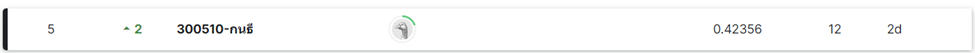test